# Gender Classification


### In this lesson, we will train a model that can detect men and women by training the pictures of men and women we have

In [2]:
#pip install opencv-python

In [2]:
import cv2
import pandas as pd
import os

In [3]:
labels=['Female','Male']
img_path='Train/'

In [4]:
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):        
        img_list.append(img_path+label+'/'+img_file) 
        label_list.append(label)   

In [5]:
df=pd.DataFrame({'img':img_list,'label':label_list})

In [6]:
df.sample(5)

,img,label
5400,Train/Female/084535.jpg,Female
123705,Train/Male/060549.jpg,Male
21587,Train/Female/009210.jpg,Female
58292,Train/Female/035185.jpg,Female
129935,Train/Male/080261.jpg,Male


In [7]:
df.shape

(160000, 2)

In [8]:
d={'Female':1,'Male':0}

In [9]:
df['encode_label']=df['label'].map(d)

In [10]:
df['encode_label'] = df['encode_label'].astype(int)

In [11]:
df.sample(5)

,img,label,encode_label
2039,Train/Female/103922.jpg,Female,1
112823,Train/Male/022971.jpg,Male,0
54072,Train/Female/099134.jpg,Female,1
155175,Train/Male/146337.jpg,Male,0
129459,Train/Male/077789.jpg,Male,0


In [12]:
import numpy as np

In [13]:
df['encode_label'].value_counts()

encode_label
1    92845
0    67155
Name: count, dtype: int64

In [14]:
import matplotlib.pyplot as plt

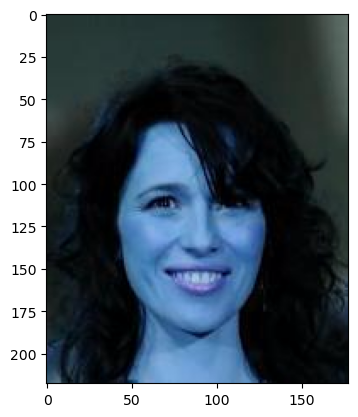

In [58]:
image=cv2.imread(str(df['img'][300]))
plt.imshow(image);

In [16]:
x=[]
for img in df['img']:
    img=cv2.imread(img)
    img=cv2.resize(img,(32,32)) 
    img=img/255.0    
    x.append(img)

In [17]:
x=np.array(x)

In [18]:
x

array([[[[0.20784314, 0.38823529, 0.35686275],
         [0.1372549 , 0.31764706, 0.26666667],
         [0.17254902, 0.34509804, 0.28235294],
         ...,
         [0.42352941, 0.59215686, 0.58823529],
         [0.21176471, 0.2745098 , 0.26666667],
         [0.2627451 , 0.22745098, 0.19215686]],

        [[0.22745098, 0.45490196, 0.43921569],
         [0.22745098, 0.42745098, 0.4       ],
         [0.2       , 0.37254902, 0.34117647],
         ...,
         [0.16078431, 0.32941176, 0.29019608],
         [0.38823529, 0.44313725, 0.40784314],
         [0.2627451 , 0.20784314, 0.20392157]],

        [[0.30196078, 0.6       , 0.58039216],
         [0.49019608, 0.69411765, 0.69803922],
         [0.60784314, 0.7254902 , 0.74901961],
         ...,
         [0.27843137, 0.48627451, 0.47843137],
         [0.25490196, 0.36862745, 0.31372549],
         [0.23529412, 0.19607843, 0.17254902]],

        ...,

        [[0.07058824, 0.07843137, 0.05882353],
         [0.07843137, 0.05882353, 0.07843137]

In [19]:
y=df['encode_label']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [22]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D, Input, Reshape, MaxPooling2D, Flatten, Dropout, BatchNormalization

### CNN Convuliton Neural Networks

In [24]:
model=Sequential()
model.add(Input(shape=(32,32,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(2, activation='softmax')) 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=15,verbose=1)

Epoch 1/15
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - accuracy: 0.8747 - loss: 0.2800 - val_accuracy: 0.9442 - val_loss: 0.1439
Epoch 2/15
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.9438 - loss: 0.1427 - val_accuracy: 0.9461 - val_loss: 0.1365
Epoch 3/15
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - accuracy: 0.9513 - loss: 0.1253 - val_accuracy: 0.9519 - val_loss: 0.1255
Epoch 4/15
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 44s 11ms/step - accuracy: 0.9568 - loss: 0.1133 - val_accuracy: 0.9543 - val_loss: 0.1179
Epoch 5/15
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 43s 11ms/step - accuracy: 0.9592 - loss: 0.1067 - val_accuracy: 0.9572 - val_loss: 0.1115
Epoch 6/15
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.9610 - loss: 0.1012 - val_accuracy: 0.9571 - val_loss: 0.1113
Epoch 7/15
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 43s 11ms/step - accuracy: 0.9618 - loss: 0.0993 - val_accuracy: 0.9568 - val_loss: 0.1112
Epoch 8/15
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - accuracy: 0.9628 -

In [26]:
loss,accuracy=model.evaluate(x_test,y_test)

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9603 - loss: 0.1147


In [27]:
accuracy

0.9589999914169312

In [28]:
tahmin=model.predict(x_test)

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


In [29]:
import matplotlib.pyplot as plt

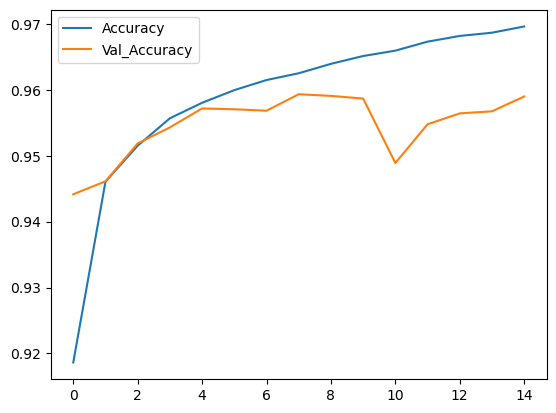

In [30]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend()

In [31]:
loss_f=pd.DataFrame(history.history)

<Axes: >

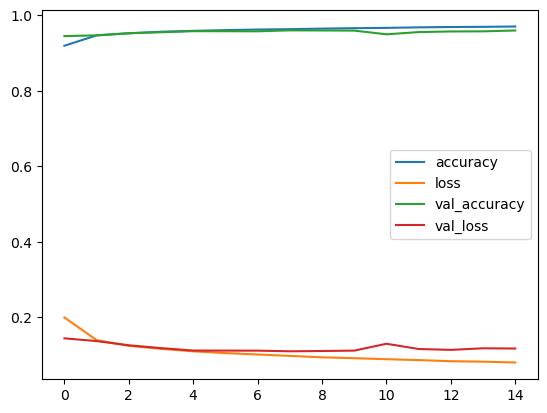

In [32]:
loss_f.plot()

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [34]:
confusion_matrix(y_test, np.argmax(tahmin, axis=1))

array([[12851,   766],
       [  546, 17837]])

In [35]:
cm=confusion_matrix(y_test, np.argmax(tahmin, axis=1))

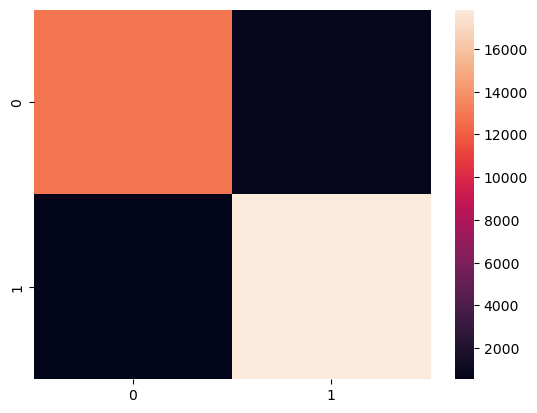

In [37]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, np.argmax(tahmin, axis=1)), annot=False);

In [38]:
print(classification_report(y_test, np.argmax(tahmin, axis=1)))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     13617
           1       0.96      0.97      0.96     18383

    accuracy                           0.96     32000
   macro avg       0.96      0.96      0.96     32000
weighted avg       0.96      0.96      0.96     32000



In [57]:
model.save('Gender.h5')

### In this lesson, accuracy: 0.95 - loss: 0.11
### [Click for the link of the Page I Created on huggingface](https://huggingface.co/spaces/SalihB/erkekkadin)